# Project 9: Anomaly Detection using Isolation Forests|  AWS EC2 & RDS CPU usage data
- Used Isolation Forests to detec anomalies in CPU consumption for AWS EC2 & RDS instances
- Performed Data Preprocessing on Training Data
- Ran visual tests to see what the effect of different Datasets and contamination metrics would result into 

In [26]:
#We'll use Pandas to deal with the dataset and seaborn to create some neat visualizations
import pandas as pd
import seaborn as sns

#We will also adjust Seaborn's default size parameters to something that displays data in a better way
sns.set(rc={'figure.figsize':(15,4)})

#Reading the dataset
df = pd.read_csv('ec2_cpu_utilization_825cc2.csv')

#Parsing the timestamp column to timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

#And making sure everything looks fine
df.head()

,timestamp,value
0,2014-04-10 00:04:00,91.958
1,2014-04-10 00:09:00,94.798
2,2014-04-10 00:14:00,92.208
3,2014-04-10 00:19:00,93.722
4,2014-04-10 00:24:00,93.042


<AxesSubplot:xlabel='timestamp', ylabel='value'>

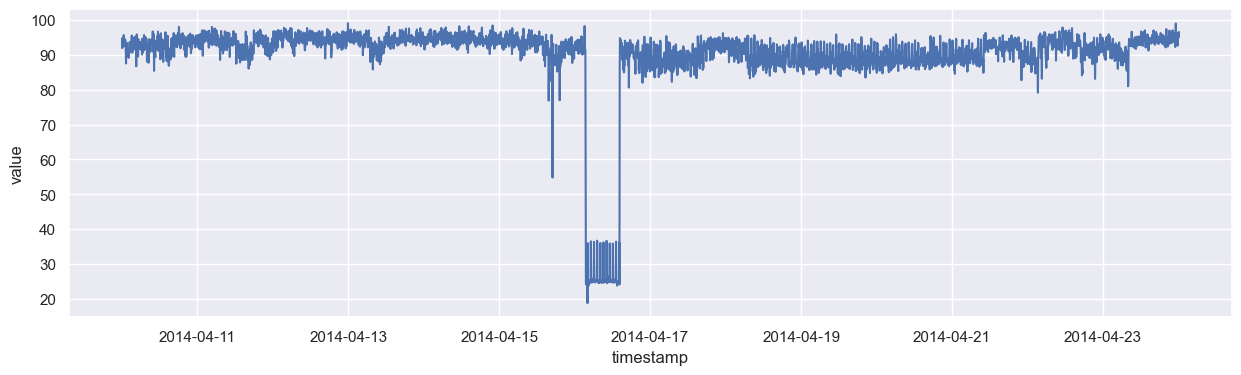

In [27]:
#Creating a chart to have an idea of the presence of potential outliers
sns.lineplot(x=df['timestamp'], y=df['value'])

<AxesSubplot:xlabel='timestamp', ylabel='value'>

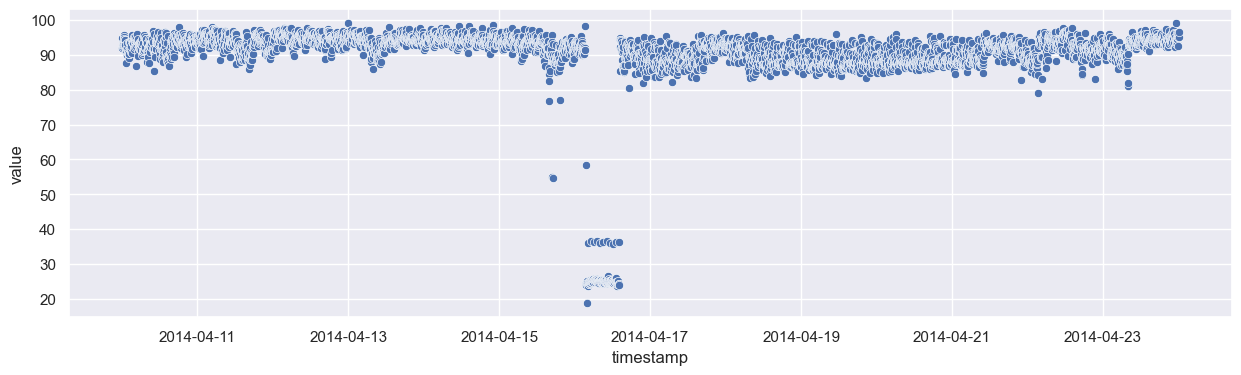

In [28]:
#Doing the same, but with a scatterplot just for fun
sns.scatterplot(x=df['timestamp'], y=df['value'])

In [29]:
#This step was not neccesary due to the nature of trees, but still wanted to give it a try
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Creating an instance of a scaler
scaler = MinMaxScaler()

#Scaling training data
X = df['value']
X_scaled = scaler.fit_transform(np.array(X).reshape(-1,1))
X_scaled

array([[0.91094029],
       [0.94626565],
       [0.91404992],
       ...,
       [0.96586874],
       [0.94930064],
       [0.96848082]])

In [30]:
#Import the isolation forest model
from sklearn.ensemble import IsolationForest

#and creating an instance of the same (The contamination field is the percentage of values that would be copnsidered outliers. 0.1 is 10%)
#Numerous examples show this being set when we already know the ratio of outliers in the data at hand, but we don't know that in advanced in thi example
model = IsolationForest(n_estimators=50,contamination=0.1)

#Fitting the model
model.fit(X_scaled)

#And populating the anomalies column
df['anom'] = pd.Series(model.predict(X_scaled))

#Mapping 1's to 0';s and -1's to 1's (isolation forests assing a -1 label to anomalies)
df['anom'] = df['anom'].map( {1: 0, -1: 1} )

In [31]:
#Making sure everything is alright
df.head()

,timestamp,value,anom
0,2014-04-10 00:04:00,91.958,0
1,2014-04-10 00:09:00,94.798,0
2,2014-04-10 00:14:00,92.208,0
3,2014-04-10 00:19:00,93.722,0
4,2014-04-10 00:24:00,93.042,0


<AxesSubplot:xlabel='timestamp', ylabel='value'>

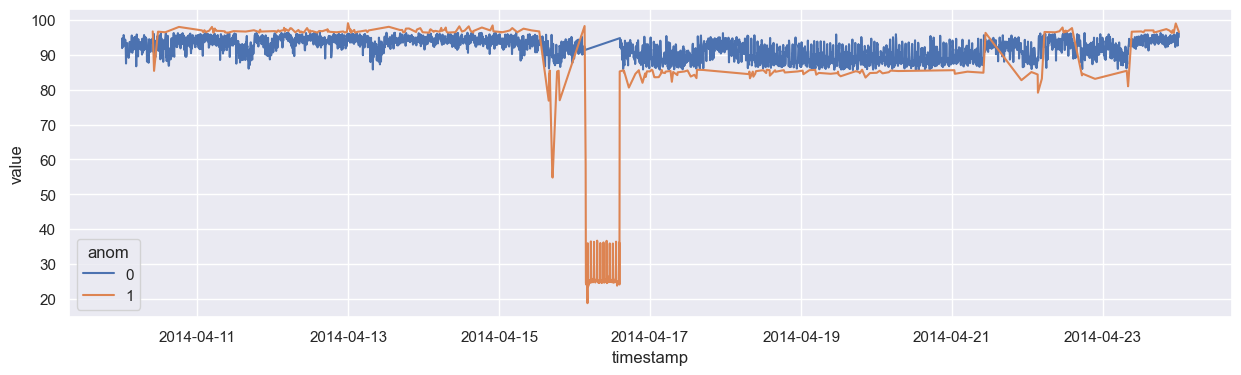

In [32]:
#Recreating the linechart but with the anomaly data as color variable
sns.lineplot(x=df['timestamp'], y=df['value'], hue=df['anom'])

<AxesSubplot:xlabel='timestamp', ylabel='value'>

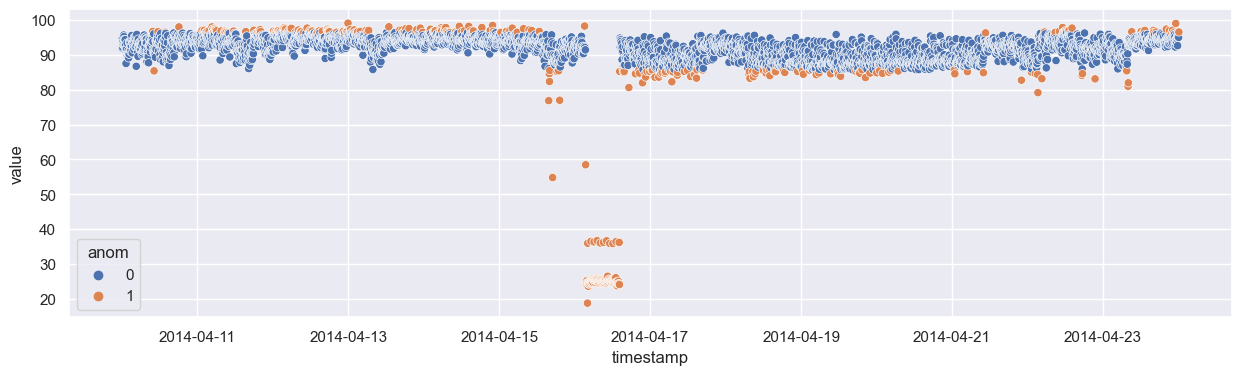

In [33]:
#And doing the same but with a scatterplot
sns.scatterplot(x=df['timestamp'], y=df['value'], hue=df['anom'])

In [34]:
#Neat! Isn't it?